In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [231]:
df = pd.read_csv("login_hours.csv")

In [232]:
df = df.sort_values(by=['car_number','active_date'],ascending=[True,True])
df = df[df.category != "auto"]
df = df.head(5000)

In [233]:
number_of_days = df["car_number"].value_counts()
number_of_days = number_of_days.sort_index()
number_of_days

A29TV6235       8
AP01TV0821      7
AP01TV0906     28
AP02TV1883     44
AP02TV2215      8
AP02TV2290     15
AP02TV2579     29
AP02TV6490     21
AP02TV6695      8
AP03TB9627     35
AP03TH0545     23
AP03TL3034      7
AP03TV0966     45
AP03TV5840     32
AP03TV6283     37
AP03TV6338     21
AP04TV1532      2
AP04TV2109      7
AP04TV2127     21
AP04TV6065     25
AP04TV6089     42
AP04TV6125     33
AP04TW1711     46
AP04UB1113     10
AP04UB1563     30
AP05TH1074      9
AP05TM1472     15
AP05TV1490      8
AP05TV4218     26
AP05TV4275     12
               ..
AP09TVA2431     4
AP09TVA2432    60
AP09TVA2434    23
AP09TVA2462     3
AP09TVA2463     1
AP09TVA2479    43
AP09TVA2505    22
AP09TVA2521     3
AP09TVA2527    26
AP09TVA2541     2
AP09TVA2550    15
AP09TVA2642    24
AP09TVA2654     8
AP09TVA2665    40
AP09TVA2675    28
AP09TVA2685     1
AP09TVA2696    42
AP09TVA2699    40
AP09TVA2710    19
AP09TVA2726    43
AP09TVA2737    32
AP09TVA2748    14
AP09TVA2797     2
AP09TVA2868    25
AP09TVA286

In [234]:
total_login_hours = df.groupby(["car_number"])["login_hours"].sum()
total_login_hours = total_login_hours.sort_index()
total_login_hours

car_number
A29TV6235        9.846944
AP01TV0821      63.160556
AP01TV0906     236.926389
AP02TV1883     320.696389
AP02TV2215      55.156667
AP02TV2290      23.669167
AP02TV2579     321.905556
AP02TV6490     110.266389
AP02TV6695      92.548056
AP03TB9627     109.752500
AP03TH0545      57.777222
AP03TL3034     109.590278
AP03TV0966     630.347222
AP03TV5840     225.613333
AP03TV6283     154.144167
AP03TV6338      48.570000
AP04TV1532       0.195556
AP04TV2109      75.583056
AP04TV2127      96.010000
AP04TV6065     100.838889
AP04TV6089     116.315833
AP04TV6125      39.305833
AP04TW1711     223.516389
AP04UB1113      49.625278
AP04UB1563     219.313056
AP05TH1074     105.583889
AP05TM1472      35.988056
AP05TV1490      32.729167
AP05TV4218     166.043056
AP05TV4275      29.176389
                  ...    
AP09TVA2431     22.744444
AP09TVA2432    167.849167
AP09TVA2434    212.459167
AP09TVA2462     13.480556
AP09TVA2463      0.007500
AP09TVA2479    243.375000
AP09TVA2505    139.694722
A

In [235]:
temp = df.groupby(["car_number"])["category"].value_counts()

In [236]:
tempdf = temp.to_frame()
l = []
for index, row in tempdf.iterrows():
   l.append(index[1])

In [237]:
l = [x for x in l if x != "prime_play"]

In [238]:
len(l)

216

In [239]:
df = pd.concat([total_login_hours,number_of_days],axis=1)

In [240]:
df["category"] = l

In [241]:
df.head()

,login_hours,car_number,category
car_number,,,
A29TV6235,9.846944,8,prime
AP01TV0821,63.160556,7,mini
AP01TV0906,236.926389,28,mini
AP02TV1883,320.696389,44,prime
AP02TV2215,55.156667,8,prime


In [242]:
df.columns = ['login_hours', 'number_of_days', 'category']

In [243]:
df["hours_per_day"] = df['login_hours']/df['number_of_days']

In [244]:
df = df.drop('login_hours',axis=1)

In [245]:
from sklearn.cluster import KMeans

In [246]:
kmeans = KMeans(n_clusters=2)

In [247]:
df = df[df.category != "micro"]

In [248]:
df["category"]  = df["category"].map({"prime":1,"economy_suv":2,"mini":3})

In [249]:
df.head()

,number_of_days,category,hours_per_day
car_number,,,
A29TV6235,8,1,1.230868
AP01TV0821,7,3,9.022937
AP01TV0906,28,3,8.461657
AP02TV1883,44,1,7.288554
AP02TV2215,8,1,6.894583


In [250]:
kmeans.fit(df.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [251]:
kmeans.labels_

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int32)

In [252]:
df["labels"] = kmeans.labels_

1    122
0     92
Name: labels, dtype: int64

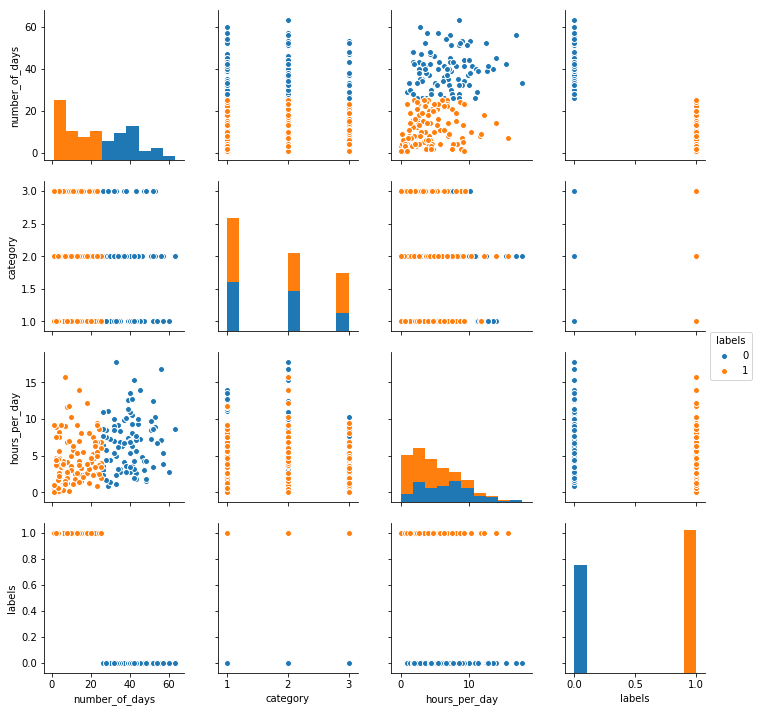

In [253]:
sns.pairplot(df,hue="labels")
print("\n")
df["labels"].value_counts()